Most existing approaches to visual odometry are based on the following stages.

1. Acquire input images
2. Image correction: apply image processing techniques for lens distortion removal, etc.
3. Feature detection: define interest operators, and match features across frames and construct optical flow field.
       
4. Check flow field vectors for potential tracking errors and remove outliers.
5. Estimation of the camera motion from the optical flow.
       
6. Periodic repopulation of trackpoints to maintain coverage across the image.

In [1]:
################################KITTI Dataset################################
#adapted from https://github.com/uoip/monoVO-python 
%run pinhole_camera.py

##kitti setup
poses_dir = 'dataset/poses/00.txt' #for ground truth
img_dir = 'dataset/sequences/00/image_0/'
cam = PinholeCamera(1241.0, 376.0, 718.8560, 718.8560, 607.1928, 185.2157)
with open(poses_dir) as f: poses = f.readlines()#poses
print "kitti loaded."

kitti loaded.


In [67]:
################################Visual Odometry################################

vo = VisualOdometry(cam, poses_dir)

traj = np.zeros((600,600,3), dtype=np.uint8)

predicted, actual = [],[]
# predicted = np.array(predicted)
# actual = np.array(actual)

#drawing trajectories for each frame starting form the 3rd
for img_id in range(30):
    img = cv2.imread(img_dir+str(img_id).zfill(6)+'.png', 0)
    
    vo.update(img, img_id)

    cur_t = vo.cur_t
    
    if(img_id > 2): 
        x, y, z = cur_t[0], cur_t[1], cur_t[2]
    else: 
        x, y, z = 0., 0., 0.
        
    #offset so the 2 trajectories do not overlap
    x_offset, y_offset = 0, 0
    draw_x, draw_y = int(x)+(290-x_offset), int(z)+(90-y_offset)
    true_x, true_y = int(vo.trueX)+290, int(vo.trueZ)+90
    
    #for drawing error line
#     np.append(predicted,(x,y))
#     np.append(actual, (vo.trueX, vo.trueY))

    predicted.append((x,y))
    actual.append((vo.trueX, vo.trueY))
    
    #openCV uses BGR colour schemes as tuples, e.g (255,0,0) is blue
    #predicted trajectory in 
    cv2.circle(traj, (draw_x,draw_y), 1, (255,0,0), 1)
    #actual trajectory
    cv2.circle(traj, (true_x,true_y), 1, (0,0,255), 1)
    
    cv2.rectangle(traj, (10, 20), (600, 60), (0,0,0), -1)
    text = "Coordinates: x=%2fm y=%2fm z=%2fm"%(x,y,z)
    cv2.putText(traj, text, (20,40), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 1, 8)
    frame = "Frame: " + str(img_id)
    cv2.putText(traj, frame, (20,60), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 1, 8)
    
#     cv2.imshow('Road facing camera', img)
#     cv2.imshow('Trajectory', traj)
#     cv2.waitKey(1)

# cv2.imwrite('map.png', traj)
cv2.destroyAllWindows()
cv2.waitKey(1)


error = np.mean( predicted != actual )

ss =

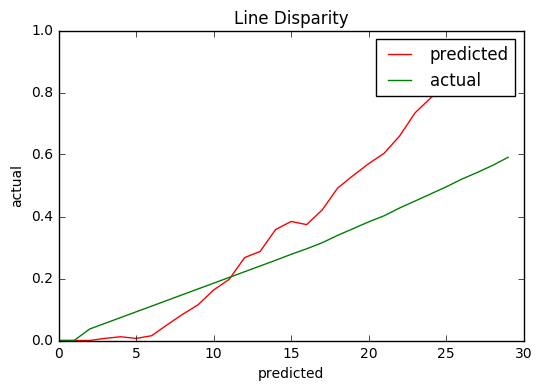

In [61]:
import matplotlib.pyplot as plt
# plt.scatter(predicted, actual, color= 'black', label= 'Data') # plotting the initial datapoints 

plt.plot(np.abs(predicted), color= 'red', label= 'predicted') # plotting the line made by the RBF kernel
plt.plot(np.abs(actual), color= 'green', label= 'actual')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Line Disparity')
plt.legend()
plt.show()

In [10]:
vo = VisualOdometry(cam, poses_dir)

# ox_vo = VisualOdometry(ox_cam, poses_dir)

traj = np.zeros((600,600,3), dtype=np.uint8)

#drawing trajectories for each frame
for img_id in range(5*500):
    img = cv2.imread(img_dir+str(img_id).zfill(6)+'.png', 0)
    
    vo.update(img, img_id)

    cur_t = vo.cur_t
    if(img_id > 2): 
        x, y, z = cur_t[0], cur_t[1], cur_t[2]
    else: 
        x, y, z = 0., 0., 0.
                
    #offset so the 2 trajectories do not overlap
    x_offset, y_offset = 0, 0
    draw_x, draw_y = int(x)+(290-x_offset), int(z)+(90-y_offset)
    true_x, true_y = int(vo.trueX)+290, int(vo.trueZ)+90

    #predicted trajectory
    cv2.circle(traj, (draw_x,draw_y), 1, (0,255,0), 1)#cv2 works with BGR
    #actual trajectory
    cv2.circle(traj, (true_x,true_y), 1, (0,0,255), 1)
    
    cv2.rectangle(traj, (10, 20), (600, 60), (0,0,0), -1)
    text = "Coordinates: x=%2fm y=%2fm z=%2fm"%(x,y,z)
    cv2.putText(traj, text, (20,40), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 1, 8)
    frame = "Frame: " + str(img_id)
    cv2.putText(traj, frame, (20,60), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 1, 8)
    
    cv2.imshow('Road facing camera', img)
    cv2.imshow('Trajectory', traj)
    cv2.waitKey(1)


cv2.imwrite('map.png', traj)
cv2.destroyAllWindows()
cv2.waitKey(1)

TypeError: 'NoneType' object has no attribute '__getitem__'

In [1]:
################################KITTI Dataset################################

#adapted from https://github.com/uoip/monoVO-python 
%run pinhole_camera.py

##kitti setup
poses_dir = 'dataset/poses/00.txt' #for ground truth
img_dir = 'dataset/sequences/00/image_0/'
cam = PinholeCamera(1241.0, 376.0, 718.8560, 718.8560, 607.1928, 185.2157)
with open(poses_dir) as f: poses = f.readlines()#poses
print "kitti loaded."

kitti loaded.


In [ ]:
##########################Adapting Existing Code################################

In [3]:
import cv2
#adapted from https://github.com/avisingh599/mono-vo
def track_features(img1, img2, points1):
    #lucas kanade(lk) optical flow parameters
    lk_params = dict(winSize  = (21, 21), 
                criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 30, 0.01))
    
    #open cv method for generating LK optical flow
    points2, status, errs = cv2.calcOpticalFlowPyrLK(img1, img2, points1, None, **lk_params)
    status = status.reshape(status.shape[0])
    
    return points1[status==1], points2[status==1]    

def detect_features(img):
    #detector parameters
    threshold_value = 20
    nonMax = True
    
    features = cv2.FastFeatureDetector_create(
        threshold=threshold_value, 
        nonmaxSuppression=nonMax)
    
    return features.detect(img)

def getAbsoluteScale(frame_id, poses):  #adapted for KITTI odometry dataset
        ground_truth = poses[frame_id-1].strip().split()
        x_prev, y_prev, z_prev = float(ground_truth[3]), float(ground_truth[7]), float(ground_truth[11])
        
        ground_truth = poses[frame_id].strip().split()
        x, y, z = float(ground_truth[3]), float(ground_truth[7]), float(ground_truth[11])
        
        return np.sqrt((x - x_prev)*(x - x_prev) + 
                       (y - y_prev)*(y - y_prev) + 
                       (z - z_prev)*(z - z_prev))

In [16]:
MAX_FRAME = 1000
MIN_FEATURES = 2000

#first 2 frames
img1 = cv2.imread(img_dir+'000000.png')
img2 = cv2.imread(img_dir+'000001.png')

#feature detection and tracking
key_points1 = detect_features(img1)
#x.pt is an interface feature of cv2 Keypoints, x.kp are keypoint coordinates
#source: https://goo.gl/59X81j
key_points1 = np.array([x.pt for x in key_points1], dtype=np.float32)
key_points1, key_points2 = track_features(img1, img2, key_points1)

#camera focal length and principle point
focal, pp = 718.8560, (607.1928, 185.2157)

#finding the essential matrix
essential_matrix,mask = cv2.findEssentialMat(
                    key_points1, 
                    key_points2, 
                    focal=focal, 
                    pp=pp, 
                    method=cv2.RANSAC, 
                    prob=0.999, 
                    threshold=1.0)

#recovering the pose and storing the results
#as (R)otational and (t)ranslational matrices
_, R, t, mask = cv2.recoverPose(
                essential_matrix,
                key_points1,
                key_points2,
                focal=focal,
                pp=pp)


prev_img = img2
curr_img = img2#placeholder to keep format 
prev_features = key_points2
curr_features = key_points2#placeholder to keep format

curr_R = np.copy(R)
curr_t = np.copy(t)

traj = np.zeros((600,600,3), dtype=np.uint8)

#performing the visual odometry and drawing trajectories for each frame
for img_id in range(1000):
    img = cv2.imread(img_dir+str(img_id).zfill(6)+'.png')
    
    prev_features, curr_features = track_features(prev_img, curr_img, key_points1)
    
    matrix,mask = cv2.findEssentialMat(curr_features,prev_features,focal,pp,cv2.RANSAC,0.999,1.0,mask)
    
    _, R, t, mask = cv2.recoverPose(matrix,key_points1,key_points2,focal=focal,pp=pp)

    prev_pts = np.zeros((len(prev_features),2), dtype=np.complex64)
    curr_pts = np.zeros((len(curr_features),2), dtype=np.complex64)

    for i in range(len(prev_features)):
        prev_pts[i][0] = prev_features[i][0]
        prev_pts[i][1] = prev_features[i][1]

        curr_pts[i][0] = curr_features[i][0]
        curr_pts[i][1] = curr_features[i][1]

    scale = getAbsoluteScale(img_id, poses)
    
    con2,con3 = (t[2] > t[0]),(t[2] > t[1])
    if ((scale>0.1) and con2 and con3):
        curr_R = R.dot(curr_R)
        curr_t += scale*(curr_R.dot(t))
        
    #redetect if num features falls below the threshold
    if(len(prev_features) < MIN_FEATURES):
        key_points1 = detect_features(img1)
        key_points1, key_points2 = track_features(img1, img2, key_points1)
    
    prev_img = np.copy(curr_img)
    prev_features = curr_features
    

    #offset so the 2 trajectories to control the overlap at start
    x_offset, y_offset = 0, 0
    if(img_id > 2): 
        x, y, z = curr_t[0] + (290-x_offset), curr_t[1] + (90-y_offset), curr_t[2]
    else: 
        x, y, z = 0., 0., 0.
        
    draw_x, draw_y = int(x), int(z)
#     true_x, true_y = int(vo.trueX)+290, int(vo.trueZ)+90

    #predicted trajectory
    cv2.circle(traj, (draw_x,draw_y), 1, (img_id*255/4540,255-img_id*255/4540,0), 1)
    #actual trajectory
#     cv2.circle(traj, (true_x,true_y), 1, (0,0,255), 1)
    
    cv2.rectangle(traj, (10, 20), (600, 60), (0,0,0), -1)
    text = "Coordinates: x=%2fm y=%2fm z=%2fm"%(x,y,z)
    cv2.putText(traj, text, (20,40), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 1, 8)
    frame = "Frame: " + str(img_id)
    cv2.putText(traj, frame, (20,60), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 1, 8)
    
    cv2.imshow('Road facing camera', img)
    cv2.imshow('Trajectory', traj)
    cv2.waitKey(1)
    
cv2.destroyAllWindows()
cv2.waitKey(1)
        
print 'done'

done


In [ ]:
################################Oxford Dataset################################
%run robotcar-sdk/python/camera_model.py
from skimage.io import imread_collection

#oxford(ox) setup
models_dir = 'robotcar-sdk/models'
ox_img_dir = 'oxford_2014-05-14-13-50-20/stereo/left/'
ox_cam = CameraModel(models_dir,ox_img_dir)
ox_imgs = imread_collection(ox_img_dir+'*.png', conserve_memory = True)
# ox_imgs = np.array(ox_imgs)
print "ox loaded."